LOADING  DRIVE FOR IMPORTING DATA IN GOOGLE COLAB

In [108]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


MAKING IMPORTS FOR THE TASK

In [0]:
import pickle #loading the data
import tensorflow as tf # OUR DL library
from tensorflow.keras import models,layers #use of high level features
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import numpy as np #for handling images
import matplotlib.pyplot as plt #for plotting
from sklearn.model_selection import train_test_split #splittin intotraining and testing data
import tensorflow as tf
import os
train_img_file="My Drive/Vision_task_dataset_public/train_image.pkl"
train_lbl_file="My Drive/Vision_task_dataset_public/train_label.pkl"
test_img_file="My Drive/Vision_task_dataset_public/test_image.pkl"

os.chdir("/gdrive/")

LOADING IN THE TRAIN IMAGES AND LABELS

In [0]:
with open(train_img_file,"rb") as fp:
    train_data=pickle.load(fp)
    fp.close()

with open(train_lbl_file,"rb") as fp:
    train_labels=pickle.load(fp)
    fp.close()

CONVERTING INTO ARRAYS AND RESHAPING THE LISTS ,GOT AFTER LOADING THE FILES

In [111]:
train_data=np.array(train_data)
train_data=np.reshape(train_data,(-1,28,28,1))
print("shape of training images array :",train_data.shape)

train_labels=np.array(train_labels)
train_labels=np.reshape(train_labels,(-1,1))
print("shape of training labels array :",train_labels.shape)
print("Different Labels are :",np.unique(train_labels))

shape of training images array : (8000, 28, 28, 1)
shape of training labels array : (8000, 1)
Different Labels are : [0 2 3 6]


LET's SEE SOME IMAGES

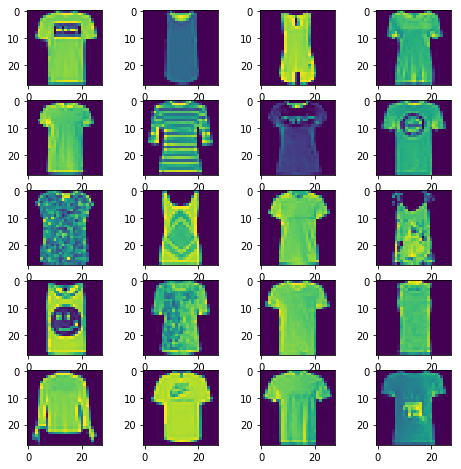

In [112]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
    img = np.reshape(train_data[i-1],(28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

PREPROCESSING THE IMAGES AND LABELS

In [113]:
train_data=train_data/255
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder()
train_labels=OHE.fit_transform(train_labels).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


MAKING THE CONVOLUTIONAL NEURAL NETWORK USING KERAS MODEL's SEQUENTIAL API


In [0]:
model = models.Sequential()
#1st layer 16 feature maps of 3X3
model.add(layers.Conv2D(16, (3, 3), padding='same',input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.20))
model.add(layers.Activation('relu'))

#2nd layer
model.add(layers.Conv2D(32, (3, 3),padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.20))

#3rd layer
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.30))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#4th layer
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.30))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#final fc layers
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

Taking a look at the model

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_v1_55 (B (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_69 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
activation_83 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_v1_56 (B (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
__________

Splitting data into training and validation sets

In [0]:
x_train,x_val,y_train,y_val=train_test_split(train_data,train_labels,test_size=0.20,random_state=42)


COMPILING THE MODEL

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

TRAINING THE MODEL

In [125]:
hist=model.fit(x_train, y_train, 
                            batch_size=32,
              epochs=50,
              validation_data=(x_val, y_val),
              shuffle=True,
              )

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 6s 880us/sample - loss: 0.8794 - acc: 0.6402 - val_loss: 1.3837 - val_acc: 0.2581
Epoch 2/50
6400/6400 [==============================] - 4s 554us/sample - loss: 0.5906 - acc: 0.7581 - val_loss: 0.8625 - val_acc: 0.6344
Epoch 3/50
6400/6400 [==============================] - 4s 552us/sample - loss: 0.5264 - acc: 0.7872 - val_loss: 0.5354 - val_acc: 0.7919
Epoch 4/50
6400/6400 [==============================] - 4s 555us/sample - loss: 0.4814 - acc: 0.8064 - val_loss: 0.5040 - val_acc: 0.7956
Epoch 5/50
6400/6400 [==============================] - 4s 557us/sample - loss: 0.4472 - acc: 0.8213 - val_loss: 0.5097 - val_acc: 0.8000
Epoch 6/50
6400/6400 [==============================] - 4s 553us/sample - loss: 0.4284 - acc: 0.8300 - val_loss: 0.4849 - val_acc: 0.7931
Epoch 7/50
6400/6400 [==============================] - 4s 556us/sample - loss: 0.4201 - acc: 0.8350 - val_loss: 0.4796 - va

PLOTTING THE ACCURACY CURVE OF BOTH THE MODELS

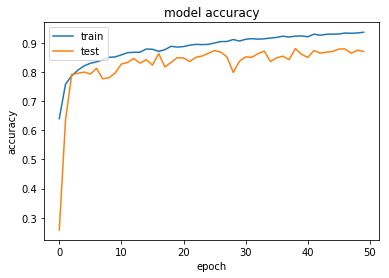

In [126]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

PLOTTING LOSS CURVES OF BOTH THE MODELS

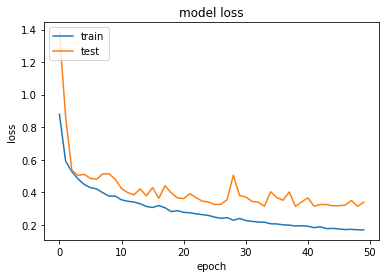

In [127]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

MAKING PREDICTIONS ON TEST DATA and STORING THE RESULTS

In [128]:
with open(test_img_file,"rb") as fp:
    test_data=pickle.load(fp)
    fp.close()
    
test_data=np.array(test_data)
test_data=np.reshape(test_data,(-1,28,28,1))
test_data=test_data/255
print("shape of training images array :",test_data.shape)

shape of training images array : (2000, 28, 28, 1)


In [0]:
y_pred=model.predict_classes(test_data)

In [0]:
final_file=list(zip(list(range(0,2000)),y_pred))

final_file.insert(0,('image_index','class'))

In [0]:
os.chdir('/')
import csv

with open('AnujTrehan.csv','w') as f:
  writer=csv.writer(f)
  writer.writerows(final_file)
f.close()